# 1- Import Libraries


In [1]:
import os              # Permite interactuar con el sistema de archivos.
import numpy as np      # Trabaja con arrays y operaciones matemáticas eficientes.
import pandas as pd     # Maneja y analiza grandes conjuntos de datos estructurados.
import random as rnd    # Genera números aleatorios para simulaciones o muestreo.
import matplotlib.pyplot as plt  # Crea gráficos y visualizaciones de datos.
%matplotlib inline      
# Muestra gráficos dentro de notebooks.

from sklearn.model_selection import train_test_split  # Divide datos en conjuntos de entrenamiento y prueba.

import keras                          # Biblioteca para construir redes neuronales.
from keras.models import Sequential   # Construye modelos de redes neuronales secuenciales.
from keras.utils import to_categorical  # Convierte etiquetas a formato categórico.
from keras.preprocessing.image import load_img  # Carga imágenes para su procesamiento.
from keras.layers import Flatten, Dense, Dropout  # Define capas de redes neuronales.
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Activation  # Capas para redes neuronales convolucionales.

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Aumenta y prepara imágenes para el entrenamiento.

print(os.listdir("/kaggle/input/dogs-vs-cats"))  # Muestra los archivos en la carpeta especificada.

['test1.zip', 'train.zip', 'sampleSubmission.csv']


# 2- Data-Constants

In [2]:
FAST_RUN = False  # Opción para entrenar más rápido o más completo (se usa mas tarde).
IMAGE_WIDTH = 128  # El ancho de cada imagen que vamos a usar.
IMAGE_HEIGHT = 128  # La altura de cada imagen que vamos a usar.
IMAGE_CHANNELS = 3  # Indica que las imágenes son a color (3 colores: rojo, verde, azul).
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)  # Establece el tamaño final de las imágenes que usaremos.

# 3- Load DataSet

In [3]:
# import zipfile

# zip_files = ['test1', 'train']

# for zip_file in zip_files:
#     with zipfile.ZipFile(f"../input/dogs-vs-cats/{zip_file}.zip", "r") as z:
#         z.extractall(".")
#         print(f"{zip_file} unzipped")

> ## Extract Compressed Files

In [4]:
import zipfile  # Sirve para abrir y descomprimir archivos comprimidos (.zip)

path = "/kaggle/input/dogs-vs-cats"  # Ubicación de los archivos comprimidos.(es un dataset disponible en kaggle)
for zip_file in os.listdir(path)[:2]:  # Recorre los primeros 2 archivos en esa ubicación.
    zipfile.ZipFile(f"{path}/{zip_file}", 'r').extractall(".")  # Abre y descomprime los archivos.
#     print(f"{path}/{zip_file}")  # (opcional) Muestra la ruta completa de cada archivo.
    print(f"{zip_file} unzipped")  # Muestra que el archivo ha sido descomprimido.

test1.zip unzipped
train.zip unzipped


# 4- Data Preprocessing

> ## Label Encoding

In [5]:
train_images = os.listdir("/kaggle/working/train")  # Lista los nombres de las imágenes en la carpeta "train".
CATEGORIES = []  # Aquí guardaremos las categorías (0 o 1) de cada imagen.

for image_name in train_images:  # Recorre cada imagen en la carpeta "train".
    class_name = image_name.split('.')[0]  # Toma el nombre antes del punto, por ejemplo: "cat" de "cat.588.jpg".
    CATEGORIES.append(0 if class_name == 'cat' else 1)  # Si es "cat", asigna 0; si no, asigna 1.

df = pd.DataFrame({"train_images": train_images, "CATEGORIES": CATEGORIES})  # Crea una tabla con las imágenes y sus categorías.


> ## Show DataFrame

In [6]:
df.head() #nos muestra las primeras filas del dataframe categorizado

train_images  CATEGORIES
0   dog.6383.jpg           1
1  cat.10712.jpg           0
2   dog.2549.jpg           1
3   cat.4841.jpg           0
4   dog.9429.jpg           1

In [7]:
df.tail() #nos muestra las últimas filas del dataframe

train_images  CATEGORIES
24995  cat.6596.jpg           0
24996  dog.2495.jpg           1
24997  cat.9216.jpg           0
24998  dog.9544.jpg           1
24999   cat.523.jpg           0

### df.describe()
¿Qué hace?
Este comando proporciona información como:

- Conteo (count): Número total de elementos en cada columna.
- Promedio (mean): Promedio de los valores en las columnas numéricas.
- Desviación estándar (std): Mide la variación o dispersión de los datos.
- Valores mínimos (min) y máximos (max): El valor más bajo y más alto en cada columna.
- Percentiles: Valores que dividen el conjunto de datos en partes (25%, 50%, 75%).

In [8]:
df.describe()  # Genera un resumen estadístico de los datos numéricos.

CATEGORIES
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000

In [9]:
df["CATEGORIES"].value_counts() #cuenta todos los resultados de cada categoría, tendremos 12500 gatos (0) y 12500 perros (1) en nuestra data

CATEGORIES
1    12500
0    12500
Name: count, dtype: int64

> ## Visualize The Data

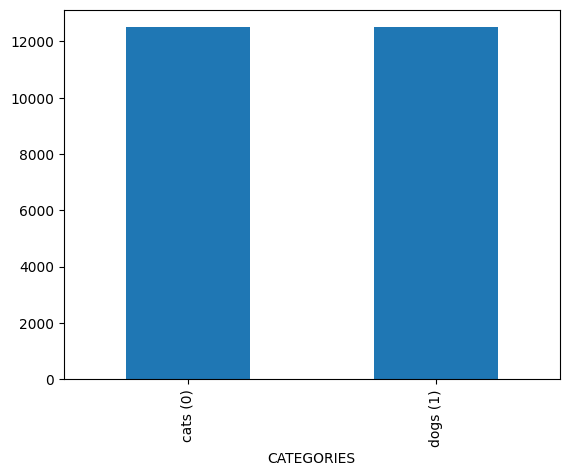

In [10]:
df["CATEGORIES"].value_counts().plot.bar() #muestra el gráfico
# Cambiamos las etiquetas del eje x, así sale cats/dogs en lugar de solo 0 y 1
plt.xticks([0, 1], ['cats (0)', 'dogs (1)'])
plt.show()

> ## *From our data we have 12500 cats and 12500 dogs*

> ## Show Dimensions Of Images

In [11]:
shapes = []  # Lista para almacenar las dimensiones de cada imagen.

for image in df["train_images"]:  # Recorre cada imagen en el DataFrame.
    path = os.path.join("/kaggle/working/train", image)  # Crea la ruta completa para cada imagen.
    image_array = plt.imread(path)  # Lee la imagen y la convierte a un formato que el programa pueda entender.
    shapes.append(image_array.shape)  # Guarda las dimensiones (alto, ancho, canales) de la imagen.

# Muestra cuántas imágenes tienen las mismas dimensiones.
print(pd.Series(shapes).value_counts())  

# Encuentra el índice de la imagen con la dimensión más pequeña.
index = np.argmin(shapes)  
print(f"\nThe Minimum Dimension is ==> {shapes[index]}\n")  # Muestra las dimensiones más pequeñas encontradas.
print("*El número 3 al final representa los canales (R,G,B)")


(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
                 ... 
(479, 388, 3)       1
(439, 330, 3)       1
(448, 357, 3)       1
(329, 493, 3)       1
(446, 476, 3)       1
Name: count, Length: 8513, dtype: int64

The Minimum Dimension is ==> (360, 327, 3)

*El número 3 al final representa los canales (R,G,B)


> ## **See sample image**


<class 'PIL.JpegImagePlugin.JpegImageFile'>


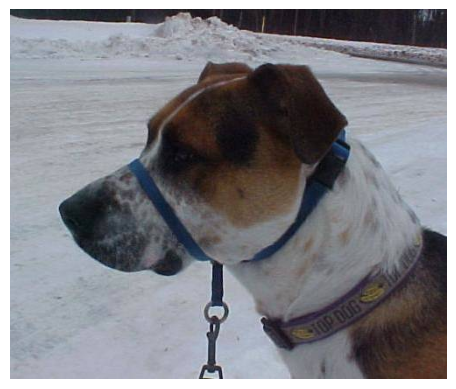

In [12]:
sample = rnd.choice(train_images)  # Selecciona una imagen al azar de la lista "train_images".
image = load_img(os.path.join("/kaggle/working/train", sample))  # Carga la imagen seleccionada desde su ubicación.
print(type(image))  # Muestra el tipo de objeto de la imagen (normalmente, será una imagen en formato PIL).

plt.imshow(image)  # Muestra la imagen seleccionada en pantalla.
plt.axis("off")  # Oculta los ejes de la imagen (no queremos ver números alrededor).
plt.show()  # Muestra la imagen final sin ejes.


> # Prepare data

In [13]:
df["CATEGORIES"] = df["CATEGORIES"].replace({0: 'cat', 1: 'dog'})  # Reemplaza 0 por "cat" y 1 por "dog" en la columna CATEGORIES. (igual que hemos hecho antes con el gráfico)

> # Split Data
Tenemos que dividir la data para tener una parte para entrenar y otra para validar si el modelo funciona

In [14]:
train_df, valid_df = train_test_split(df, test_size=0.20, random_state=42)  
# Divide los datos en dos partes: 80% para entrenar y 20% para validar. train_test_split proviene de la librería sklearn.

train_df = train_df.reset_index(drop=True)  
# Resetea los índices del conjunto de entrenamiento, eliminando los números originales.

valid_df = valid_df.reset_index(drop=True)  
# Resetea los índices del conjunto de validación, eliminando los números originales.

> # Show train DataFrame

In [15]:
train_df['CATEGORIES'].value_counts()

CATEGORIES
cat    10019
dog     9981
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

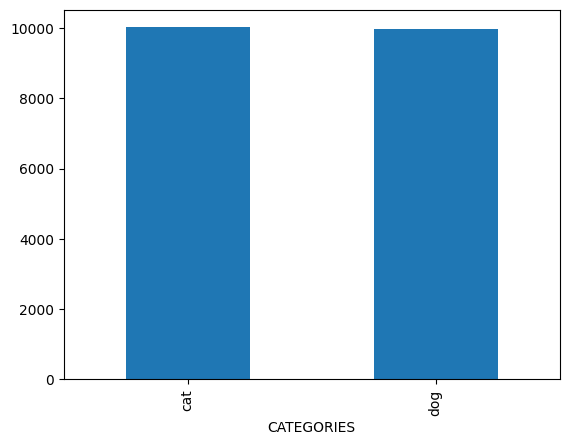

In [16]:
train_df['CATEGORIES'].value_counts().plot.bar()

> # Show valid DataFrame

In [17]:
valid_df['CATEGORIES'].value_counts()

CATEGORIES
dog    2519
cat    2481
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

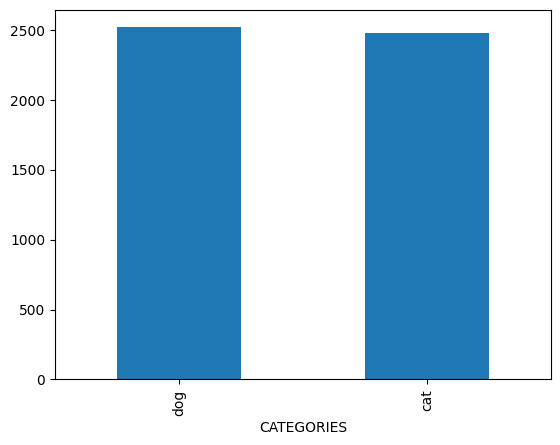

In [18]:
valid_df['CATEGORIES'].value_counts().plot.bar()

> # Data Augmentation

In [19]:
total_train = train_df.shape[0]  # Cuenta el número total de imágenes en el conjunto de entrenamiento.
total_validate = valid_df.shape[0]  # Cuenta el número total de imágenes en el conjunto de validación.
batch_size = 15  # Define el número de imágenes que procesamos a la vez durante el entrenamiento.

print(f'TOTAL TRAIN: {total_train}')
print(f'TOTAL VALIDATE: {total_validate}')

TOTAL TRAIN: 20000
TOTAL VALIDATE: 5000


> ## Train Generator

In [20]:
df.head()

train_images CATEGORIES
0   dog.6383.jpg        dog
1  cat.10712.jpg        cat
2   dog.2549.jpg        dog
3   cat.4841.jpg        cat
4   dog.9429.jpg        dog

## Procesamiento de Imágenes para el Entrenamiento

`ImageDataGenerator` aplica transformaciones como rotaciones y zoom para mejorar los datos de entrenamiento. `flow_from_dataframe` carga imágenes y categorías de un archivo. El modo `categorical` clasifica las imágenes como gato o perro. `batch_size` define cuántas imágenes se procesan juntas.

Aumentar y transformar imágenes durante el entrenamiento mejora la capacidad del modelo para generalizar y reconocer patrones, incluso en situaciones nuevas. Al procesar las imágenes en pequeños lotes y etiquetarlas correctamente, optimizamos el uso de recursos computacionales y mejoramos la precisión del modelo en la clasificación.



In [21]:
train_datagen = ImageDataGenerator(  # Crea un generador que transforma las imágenes de varias maneras.
    rotation_range=15,  # Gira las imágenes hasta 15 grados al azar.
    rescale=1./255,  # Normaliza los valores de los píxeles para que estén entre 0 y 1.
    shear_range=0.1,  # Aplica un efecto de corte o "cisallamiento" en las imágenes.
    zoom_range=0.2,  # Realiza un zoom al azar en las imágenes hasta un 20%.
    horizontal_flip=True,  # Gira las imágenes horizontalmente (de izquierda a derecha).
    width_shift_range=0.1,  # Desplaza las imágenes horizontalmente hasta un 10%.
    height_shift_range=0.1  # Desplaza las imágenes verticalmente hasta un 10%.
)

train_generator = train_datagen.flow_from_dataframe(  # Genera imágenes modificadas a partir del DataFrame.
    train_df,  # Usa el conjunto de entrenamiento.
    "/kaggle/working/train",  # Ruta donde están almacenadas las imágenes.
    x_col='train_images',  # Columna que contiene los nombres de las imágenes.
    y_col='CATEGORIES',  # Columna que contiene las categorías (gato o perro).
    target_size=IMAGE_SIZE,  # Tamaño al que se redimensionarán las imágenes.
    class_mode='categorical',  # Las etiquetas de las imágenes estarán en formato categórico (una para gato, otra para perro).
    batch_size=batch_size  # Número de imágenes procesadas juntas en cada lote.
)


Found 20000 validated image filenames belonging to 2 classes.


> # Valid Generator

Aún no estamos entrenando el modelo. Lo que estamos haciendo es preparar el conjunto de validación con valid_generator. Esto será usado más adelante durante el entrenamiento para evaluar el rendimiento del modelo. Es decir, una vez que entrenemos el modelo con los datos de entrenamiento, el conjunto de validación se usará para ver qué tan bien el modelo generaliza a datos que no ha visto antes.

In [22]:
valid_datagen = ImageDataGenerator(rescale=1./255)  
# Normaliza los valores de los píxeles de las imágenes de validación, convirtiéndolos en un rango de 0 a 1.

valid_generator = valid_datagen.flow_from_dataframe(  
    valid_df,  # Utiliza el conjunto de datos de validación.
    "/kaggle/working/train",  # Ruta donde están almacenadas las imágenes.
    x_col='train_images',  # Columna que contiene los nombres de las imágenes.
    y_col='CATEGORIES',  # Columna que contiene las categorías (gato o perro).
    target_size=IMAGE_SIZE,  # Redimensiona las imágenes al tamaño especificado.
    class_mode='categorical',  # Las etiquetas están en formato categórico (gato/perro).
    batch_size=batch_size  # Procesa las imágenes en lotes pequeños, de tamaño batch_size.
)


Found 5000 validated image filenames belonging to 2 classes.


># Example Generator

Lo que estamos haciendo ahora es seleccionar una imagen de ejemplo del conjunto de entrenamiento y prepararla con el `example_generator`. Esto se usa para ver cómo se procesará una imagen antes de aplicar el modelo completo. Este generador realiza las transformaciones necesarias (como redimensionado y normalización) y ayuda a visualizar cómo se manejan las imágenes individuales en el flujo de datos.


In [23]:
example_df = train_df.sample(n=1)  # Toma una muestra aleatoria de 1 imagen del conjunto de entrenamiento.
print(example_df, "\n")  # Muestra la información de esa imagen seleccionada.

example_df = example_df.reset_index(drop=True)  # Reinicia los índices de la muestra seleccionada para que empiece desde 0.
print(example_df, "\n")  # Muestra la información con el nuevo índice.

example_generator = train_datagen.flow_from_dataframe(
    example_df,  # Utiliza la muestra de 1 imagen que seleccionamos.
    "/kaggle/working/train",  # Ruta donde están las imágenes.
    x_col='train_images',  # Columna con los nombres de las imágenes.
    y_col='CATEGORIES',  # Columna con las categorías (gato o perro).
    target_size=IMAGE_SIZE,  # Redimensiona la imagen al tamaño deseado.
    class_mode='categorical'  # Define que las categorías son en formato categórico (gato o perro).
)


       train_images CATEGORIES
16533  cat.1630.jpg        cat 

   train_images CATEGORIES
0  cat.1630.jpg        cat 

Found 1 validated image filenames belonging to 1 classes.


> # Show Generated Images from One-Image

En esta parte, estamos usando el `example_generator` para visualizar cómo las imágenes seleccionadas aleatoriamente del conjunto de entrenamiento se procesan antes del entrenamiento completo. Mostramos varias imágenes transformadas (como redimensionado o volteo) para verificar que las modificaciones realizadas por el generador sean correctas. Esta visualización nos permite comprobar que el flujo de datos funciona como se espera antes de pasar al proceso de entrenamiento.


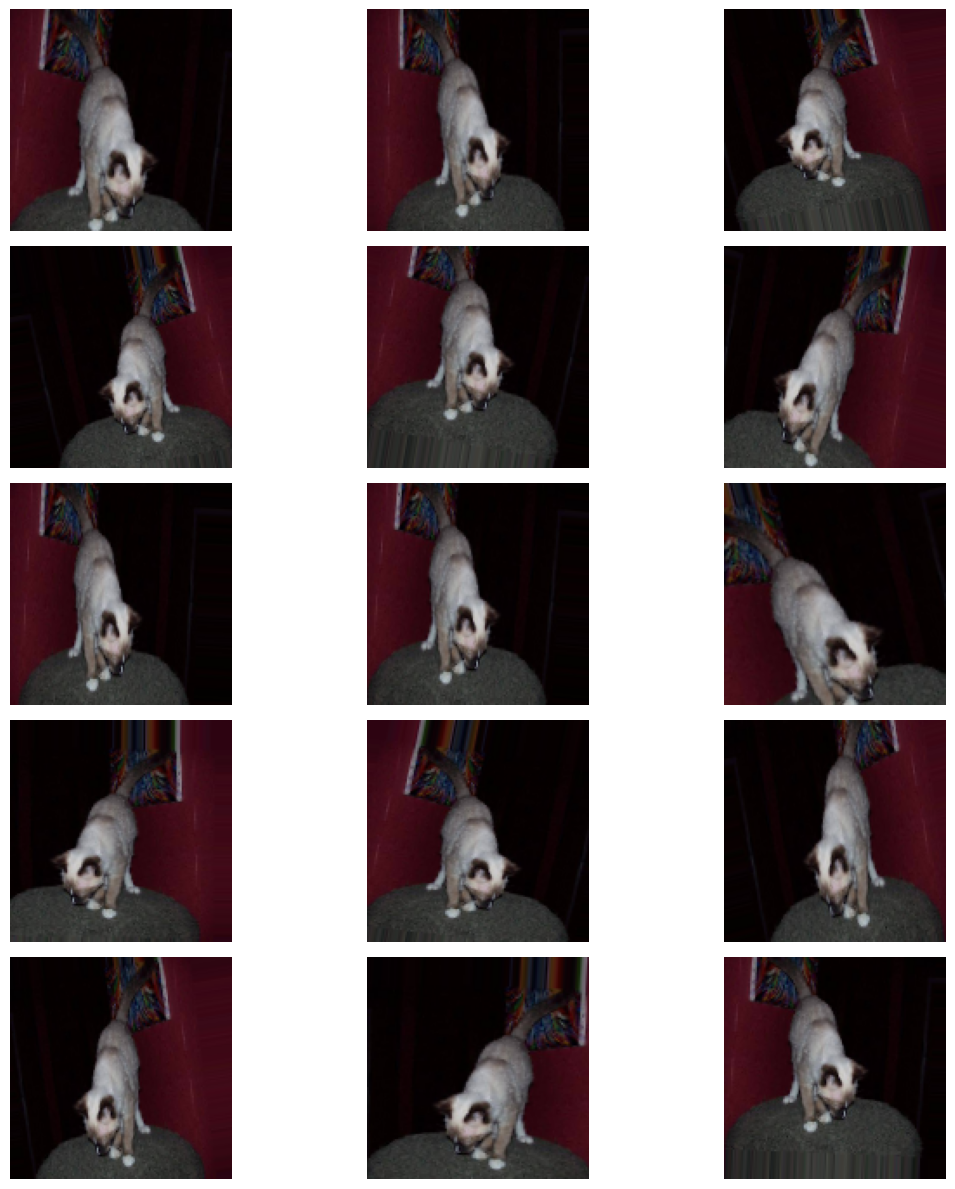

In [24]:
plt.figure(figsize=(12, 12))  # Crea una figura de tamaño 12x12 para mostrar varias imágenes.
for i in range(0, 15):  # Repite el proceso 15 veces para mostrar 15 imágenes.
    plt.subplot(5, 3, i+1)  # Divide el área de la figura en una cuadrícula de 5 filas y 3 columnas.
    for X_batch, Y_batch in example_generator:  # Obtiene un lote de imágenes y sus categorías del generador.
        image = X_batch[0]  # Toma la primera imagen del lote.
        plt.imshow(image)  # Muestra la imagen.
        plt.axis('off')  # Oculta los ejes alrededor de la imagen.
        break  # Sale del bucle después de mostrar la imagen para evitar mostrar el mismo lote varias veces.
plt.tight_layout()  # Ajusta el diseño para que las imágenes no se superpongan.
plt.show()  # Muestra la figura con todas las imágenes.

# 5- Build The Model

![image](https://i.imgur.com/ebkMGGu.jpg)

> * **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
> * **Conv Layer**: This layer will extract features from image.
> * **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
> * **Fully Connected Layer**: It connect the network from a layer to another layer
> * **Output Layer**: It is the predicted values layer.

> # Fit Model
En esta fase, estamos construyendo la estructura del modelo. Definimos las capas que utilizará para procesar y clasificar las imágenes, como capas convolucionales, de agrupación y densas. Además, lo configuramos para que pueda ser entrenado más adelante, especificando la función de pérdida, el optimizador y las métricas que evaluaremos. Aún no estamos entrenando el modelo; simplemente lo estamos preparando para el siguiente paso.

In [25]:
model = Sequential([  # Creamos un modelo secuencial, donde las capas se apilan una tras otra.
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),  
    # Capa convolucional que aplica 32 filtros de tamaño 3x3 a las imágenes. Ayuda a detectar patrones como bordes.
    
    MaxPool2D(pool_size=(4,4)),  # Reduce el tamaño de la imagen, manteniendo solo la información importante.
    Dropout(rate=0.25),  # Apaga aleatoriamente el 25% de las neuronas para evitar sobreajuste.

    Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional con 64 filtros.
    BatchNormalization(),  # Normaliza los valores de salida para mejorar la estabilidad y acelerar el entrenamiento.
    MaxPool2D(pool_size=(4,4)),  # Segunda reducción del tamaño de la imagen.
    Dropout(rate=0.25),  # Apaga el 25% de las neuronas.

    Conv2D(128, (3, 3), activation='relu'),  # Tercera capa convolucional con 128 filtros.
    BatchNormalization(),  # Normaliza las salidas.
    MaxPool2D(pool_size=(4,4)),  # Tercera reducción de tamaño de la imagen.
    Dropout(rate=0.25),  # Apaga el 25% de las neuronas.

    Flatten(),  # Aplana la imagen en un vector para que pueda ser usada en las capas densas.

    Dense(512, activation='relu'),  # Capa densa totalmente conectada con 512 neuronas.
    Dropout(rate=0.5),  # Apaga el 50% de las neuronas para evitar sobreajuste.

    Dense(2, activation='softmax')  # Capa de salida con 2 neuronas (gato o perro) usando softmax para clasificación.
])

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
# Configura el modelo con la función de pérdida, el optimizador y la métrica que mediremos (exactitud).

# Resumen del Modelo
model.summary()  # Muestra un resumen de las capas y parámetros del modelo.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,090 (629.26 KB)

 Trainable params: 160,706 (627.76 KB)

 Non-trainable params: 384 (1.50 KB)

> ## Callbacks

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

> ### Early Stop
> To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [27]:
earlystop = EarlyStopping(patience=5)

> ### Learning Rate Reduction
> We will reduce the learning rate when then accuracy not increase for 2 steps

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',  # Monitorea la exactitud en los datos de validación.
                                            patience=2,  # Si no mejora en 2 épocas, reduce la tasa de aprendizaje.
                                            verbose=1,  # Muestra mensajes sobre el cambio de la tasa de aprendizaje.
                                            factor=0.5,  # Reduce la tasa de aprendizaje a la mitad.
                                            min_lr=0.00001)  # Define la tasa de aprendizaje mínima.

callbacks = [earlystop, learning_rate_reduction]  # Lista de funciones especiales que ejecutamos durante el entrenamiento.


In [29]:
epochs = 3 if FAST_RUN else 10  # Si FAST_RUN es True, entrenamos por 3 épocas; de lo contrario, 10 épocas.

history = model.fit(train_generator,  # Utiliza el conjunto de imágenes de entrenamiento.
                    epochs=epochs,  # Entrena por 3 o 10 repeticiones, según FAST_RUN.
                    validation_data=valid_generator,  # Usa el conjunto de validación para evaluar el rendimiento.
#                     validation_steps=total_validate//batch_size, # Opcional: número de pasos en validación.
#                     steps_per_epoch=total_train//batch_size,     # Opcional: número de pasos por época.
                    callbacks=callbacks)  # Usa las funciones especiales (como reducción de tasa de aprendizaje y early stopping).


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 194s 143ms/step - accuracy: 0.5286 - loss: 0.8797 - val_accuracy: 0.5558 - val_loss: 0.8088 - learning_rate: 0.0010
Epoch 2/10


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 192s 143ms/step - accuracy: 0.5917 - loss: 0.6753 - val_accuracy: 0.6496 - val_loss: 0.6464 - learning_rate: 0.0010
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 193s 144ms/step - accuracy: 0.6549 - loss: 0.6359 - val_accuracy: 0.6800 - val_loss: 0.5885 - learning_rate: 0.0010
Epoch 4/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 194s 145ms/step - accuracy: 0.6904 - loss: 0.5921 - val_accuracy: 0.7068 - val_loss: 0.5836 - learning_rate: 0.0010
Epoch 5/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 191s 143ms/step - accuracy: 0.7043 - loss: 0.5770 - val_accuracy: 0.6570 - val_loss: 0.7650 - learning_rate: 0.0010
Epoch 6/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 190s 142ms/step - accuracy: 0.7283 - loss: 0.5544 - val_accuracy: 0.7306 - val_loss: 0.5329 - learning_rate: 0.0010
Epoch 7/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 190s 142ms/step - accuracy: 0.7331 - loss: 0.5419 - val_accuracy: 0.7192 - val_loss: 0.5672 - learning_rate: 0.0010
Epoch 8/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 191s 142ms/step - acc

> # Visualización de Resultados

En esta fase, estamos visualizando el rendimiento del modelo a lo largo del entrenamiento. Graficamos la **precisión** y la **pérdida** tanto para el conjunto de entrenamiento como para el conjunto de validación. Esto nos permite ver cómo el modelo ha mejorado (o no) con cada época. Un buen modelo mostrará que la precisión aumenta y la pérdida disminuye tanto en los datos de entrenamiento como en los de validación.


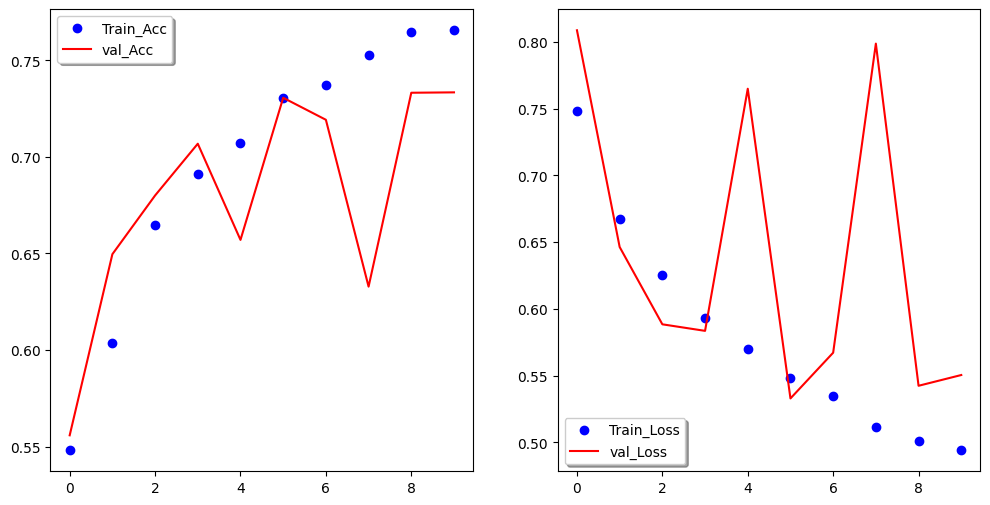

In [30]:
accuracy = history.history["accuracy"]  # Guarda los valores de precisión del entrenamiento.
val_accuracy = history.history["val_accuracy"]  # Guarda los valores de precisión en los datos de validación.

loss = history.history["loss"]  # Guarda los valores de pérdida del entrenamiento.
val_loss = history.history["val_loss"]  # Guarda los valores de pérdida en los datos de validación.

epochs = range(len(accuracy))  # Crea una lista de números de épocas (ciclos de entrenamiento).

plt.figure(figsize=(12,6))  # Crea un gráfico de tamaño 12x6 pulgadas.

plt.subplot(1,2,1)  # Crea el primer gráfico en una cuadrícula de 1 fila y 2 columnas.
plt.plot(epochs, accuracy, 'bo', label="Train_Acc")  # Grafica la precisión de entrenamiento.
plt.plot(epochs, val_accuracy, 'r', label="val_Acc")  # Grafica la precisión de validación.
plt.legend(loc='best', shadow=True)  # Muestra una leyenda explicando qué es cada línea.

plt.subplot(1,2,2)  # Crea el segundo gráfico.
plt.plot(epochs, loss, 'bo', label="Train_Loss")  # Grafica la pérdida de entrenamiento.
plt.plot(epochs, val_loss, 'r', label="val_Loss")  # Grafica la pérdida de validación.
plt.legend(loc='best', shadow=True)  # Muestra una leyenda explicando qué es cada línea.

plt.show()  # Muestra los dos gráficos.


> # The Epochs = 10 Only. We Can Increase The number of Epochs to Reach Suitable Accuracy.

> # Preparación de Datos de Prueba

En esta fase, estamos preparando el conjunto de imágenes de prueba. Cargamos los nombres de los archivos de prueba desde la carpeta correspondiente y creamos un DataFrame que almacena esa información. También calculamos cuántas imágenes de prueba tenemos en total. Esto es el primer paso para hacer predicciones usando el modelo entrenado.


In [31]:
test_file_names = os.listdir("/kaggle/working/test1")  # Lista los nombres de los archivos de prueba en la carpeta "test1".
test_df = pd.DataFrame({'file_name': test_file_names})  # Crea un DataFrame con los nombres de los archivos de prueba.

total_testing = test_df.shape[0]  # Cuenta el número total de archivos de prueba.


> # Test The Model

> # Create Testing Generator

In [32]:
test_gen = ImageDataGenerator(rescale=1./255)  # Normaliza los valores de los píxeles de las imágenes de prueba.

test_generator = test_gen.flow_from_dataframe(
    test_df,  # Utiliza el DataFrame que contiene los nombres de los archivos de prueba.
    "/kaggle/working/test1",  # Ruta donde están las imágenes de prueba.
    x_col='file_name',  # Columna que contiene los nombres de las imágenes.
    y_col=None,  # No tenemos etiquetas (categorías) porque son imágenes para probar.
    class_mode=None,  # No se necesitan etiquetas ya que solo queremos hacer predicciones.
    target_size=IMAGE_SIZE,  # Redimensiona las imágenes al tamaño deseado.
    batch_size=batch_size,  # Procesa las imágenes en lotes pequeños.
    shuffle=False  # No mezclamos las imágenes para que las predicciones sigan el mismo orden que los nombres.
)


Found 12500 validated image filenames.


> # Predict

In [33]:
predictions = model.predict(test_generator)  # Utiliza el modelo entrenado para hacer predicciones en las imágenes de prueba.

834/834 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step


> For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [34]:
test_df["CATEGORIES"] = np.argmax(predictions, axis=1)  # Asigna la categoría (gato o perro) con la mayor probabilidad a cada imagen.

> We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [35]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())  # Crea un diccionario para mapear 0 a "cat" y 1 a "dog".
test_df['CATEGORIES'] = test_df['CATEGORIES'].replace(label_map)  # Reemplaza los valores 0 y 1 en la columna CATEGORIES con "cat" o "dog".

> From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0



In [36]:
test_df['CATEGORIES'] = test_df['CATEGORIES'].replace({ 'dog': 1, 'cat': 0 })  # Reemplaza las etiquetas de texto "dog" por 1 y "cat" por 0.

/tmp/ipykernel_17/1304616296.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['CATEGORIES'] = test_df['CATEGORIES'].replace({ 'dog': 1, 'cat': 0 })  # Reemplaza las etiquetas de texto "dog" por 1 y "cat" por 0.


# 6- Visualize The Result

<Axes: xlabel='CATEGORIES'>

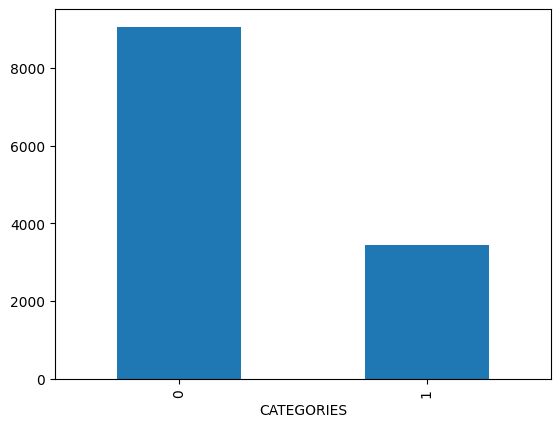

In [37]:
test_df["CATEGORIES"].value_counts().plot.bar()  # Cuenta cuántas veces aparece cada categoría y crea un gráfico de barras.

> # Show Predicted Images

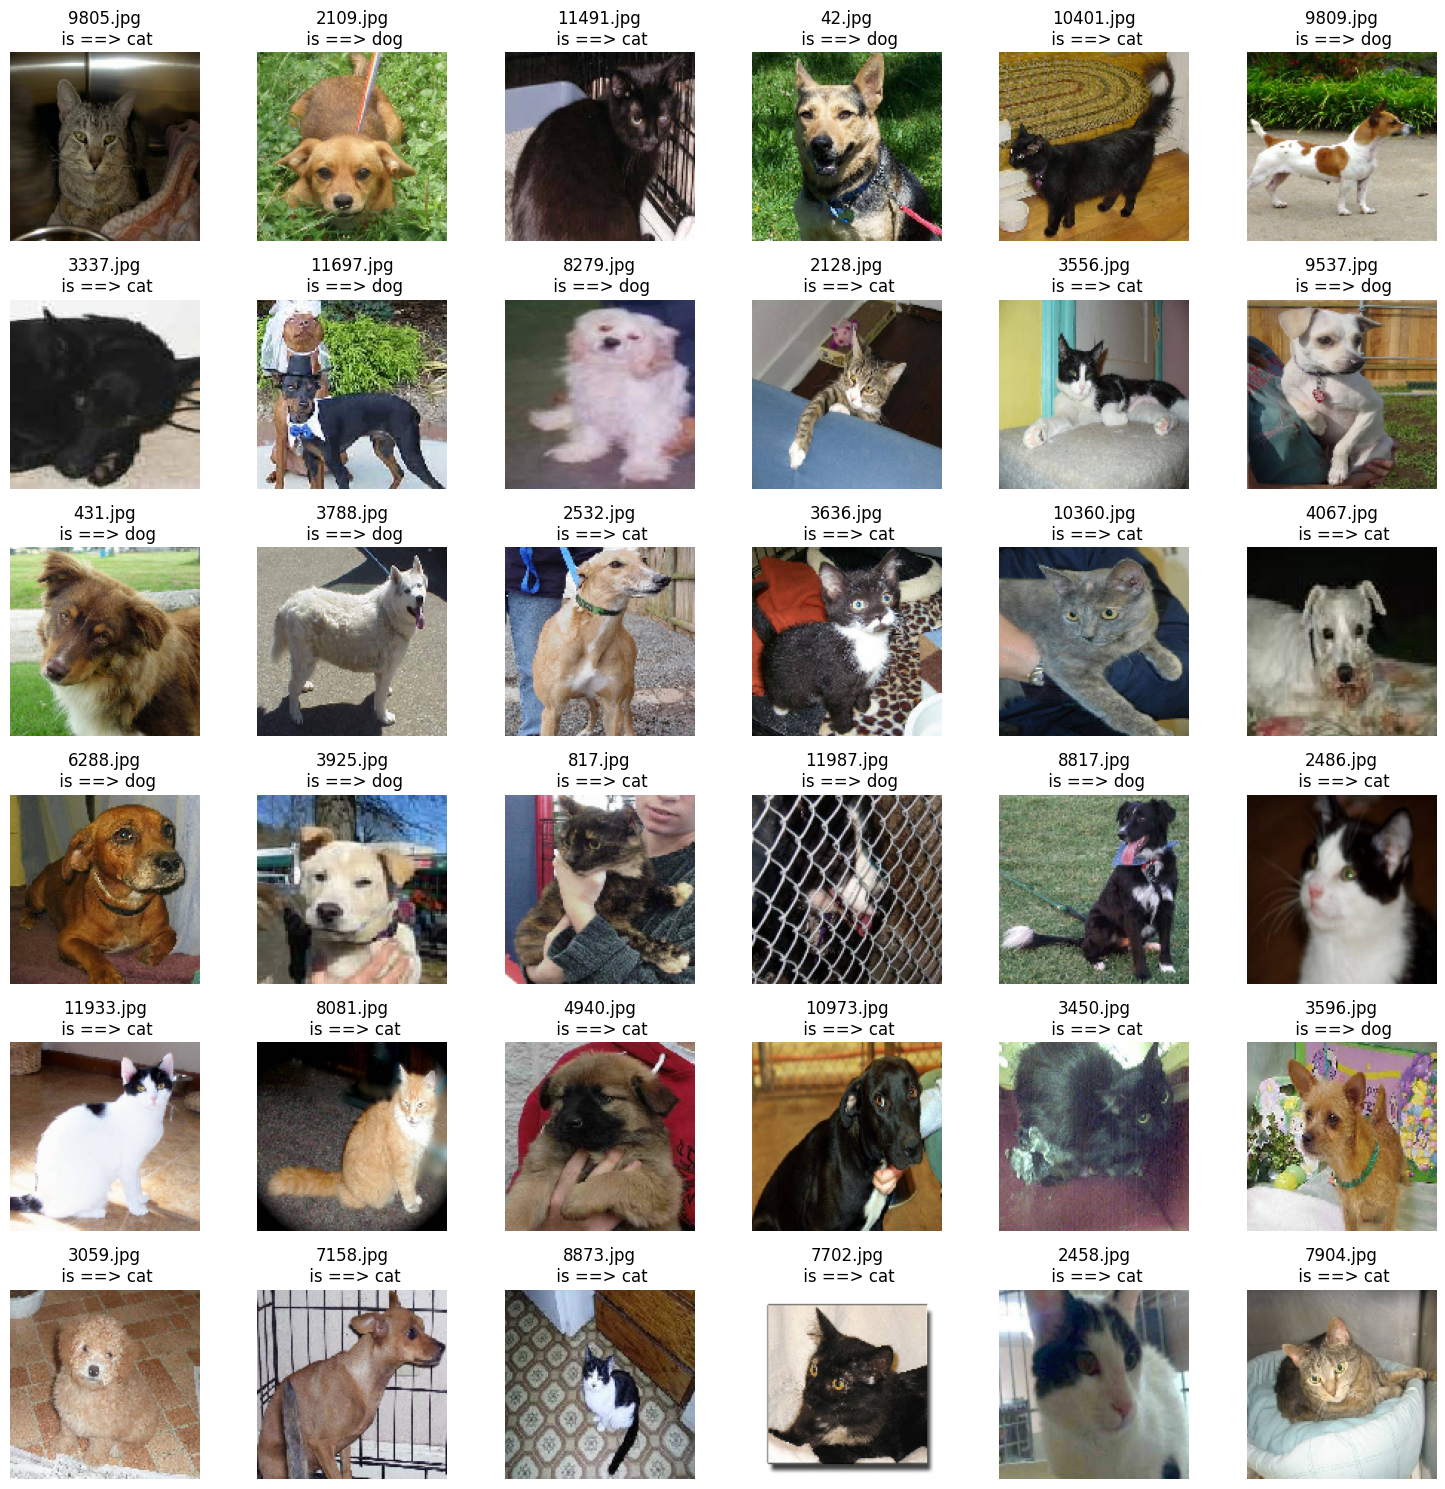

In [38]:
sample_test = test_df.head(36)  # Selecciona las primeras 36 imágenes del DataFrame de prueba.

plt.figure(figsize=(15,15))  # Crea una figura de 15x15 pulgadas para mostrar las imágenes.

for index, row in sample_test.iterrows():  # Recorre cada fila (imagen) en la muestra de prueba.
    file_name = row['file_name']  # Obtiene el nombre del archivo de la imagen.
    category = row['CATEGORIES']  # Obtiene la categoría predicha (0 para gato, 1 para perro).
    path = os.path.join("/kaggle/working/test1", file_name)  # Crea la ruta completa a la imagen.
    img = load_img(path, target_size=IMAGE_SIZE)  # Carga la imagen y la redimensiona al tamaño especificado.
    
    plt.subplot(6, 6, index + 1)  # Crea un área de visualización de 6 filas por 6 columnas.
    plt.imshow(img)  # Muestra la imagen.
    plt.title(f"{file_name}\n is ==> {'cat' if category==0 else 'dog'}")  # Establece el título, indicando si es un gato o un perro.
    plt.axis('off')  # Oculta los ejes para una visualización más limpia.

plt.tight_layout()  # Ajusta el espacio entre las imágenes para evitar que se superpongan.
plt.show()  # Muestra todas las imágenes en la cuadrícula.


# 7- Save The Model

In [39]:
model.save("CNN.h5")  # Guarda todo el modelo, incluyendo la arquitectura, los pesos y la configuración de entrenamiento en un archivo.
model.save_weights("CNN.weights.h5")  # Guarda solo los pesos del modelo en un archivo separado.

# 8- Submission

In [40]:
submission_df = test_df.copy()  # Crea una copia del DataFrame de prueba para preparar el archivo de envío.

submission_df['id'] = submission_df['file_name'].str.split('.').str[0]  
# Crea una nueva columna 'id' tomando el nombre del archivo y eliminando la extensión.

submission_df['label'] = submission_df['CATEGORIES']  
# Crea una nueva columna 'label' con los valores de la categoría predicha (gato o perro).

submission_df.drop(['file_name', 'CATEGORIES'], axis=1, inplace=True)  
# Elimina las columnas 'file_name' y 'CATEGORIES' del DataFrame, ya no son necesarias.

submission_df.to_csv("submission.csv", index=False)  
# Guarda el DataFrame como un archivo CSV llamado 'submission.csv' sin el índice.